`Importer les packages de base au traitement de data`

In [292]:
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from packages import functions

importlib.reload(functions)
#Afficher toutes les colonnes des dataframes
pd.set_option("display.max_columns", None)

### Importation des différents datasets

In [293]:
eval_df = pd.read_csv("./data/extrait_eval.csv")
sirh_df = pd.read_csv("./data/extrait_sirh.csv")
survey_df = pd.read_csv("./data/extrait_sondage.csv")

print("Extrait du système SIRH")
display(sirh_df.head(3))
print("\nExtrait du système d'évaluation de performance")
display(eval_df.head(3))
print("\nSondage effectué sur la satisfaction des employés")
display(survey_df.head(3))

Extrait du système SIRH


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0



Extrait du système d'évaluation de performance


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %



Sondage effectué sur la satisfaction des employés


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0


## Définition des différentes features

#### Fichier SIRH
***informations sur la fonction qu’occupe un employé, son âge, salaire, ancienneté***

| Feature                        | Description                                                         |
|--------------------------------|---------------------------------------------------------------------|
| id_employee                     | Identifiant unique de l'employé                                     |
| age                             | Âge de l'employé                                                    |
| genre                           | Sexe de l'employé (F pour femme, M pour homme)                     |
| revenu_mensuel                  | Salaire mensuel de l'employé                                        |
| statut_marital                  | Statut marital de l'employé                                         |
| departement                     | Département ou service auquel appartient l'employé                  |
| poste                           | Poste occupé par l'employé dans l'entreprise                        |
| nombre_experiences_precedentes  | Nombre d'années d'expérience professionnelle avant l'entreprise    |
| nombre_heures_travailless       | Nombre d'heures travaillées par l'employé                           |
| annee_experience_totale         | Nombre total d'années d'expérience professionnelle                  |
| annees_dans_l_entreprise        | Durée d'ancienneté de l'employé dans l'entreprise                  |
| annees_dans_le_poste_actuel     | Durée pendant laquelle l'employé occupe son poste actuel            |


#### Ficier SI
***spécifiquement pour les évaluations annuelles de performance***

| Feature                                 | Description                                                         |
|----------------------------------------|---------------------------------------------------------------------|
| satisfaction_employee_environnement    | Niveau de satisfaction de l'employé vis-à-vis de l'environnement de travail |
| note_evaluation_precedente              | Note obtenue lors de l'évaluation annuelle précédente               |
| niveau_hierarchique_poste               | Niveau hiérarchique du poste occupé par l'employé                  |
| satisfaction_employee_nature_travail   | Satisfaction de l'employé concernant la nature de son travail       |
| satisfaction_employee_equipe            | Satisfaction de l'employé vis-à-vis de son équipe                  |
| satisfaction_employee_equilibre_pro_perso | Satisfaction de l'employé concernant l'équilibre vie professionnelle / vie personnelle |
| eval_number                             | Numéro ou identifiant de l'évaluation                               |
| note_evaluation_actuelle                | Note obtenue lors de l'évaluation annuelle actuelle                 |
| heure_supplementaires                   | Nombre d'heures supplémentaires effectuées                          |
| augementation_salaire_precedente        | Montant ou taux d'augmentation de salaire lors de la dernière évaluation |


### Fichier sondage

***Utiliser pour mettre en place des actions pour le bien-être des employés***

| Feature                               | Description                                                         |
|---------------------------------------|---------------------------------------------------------------------|
| a_quitte_l_entreprise                 | Indique si l'employé a quitté l'entreprise (Oui/Non)               |
| nombre_participation_pee              | Nombre de participations à un plan d'épargne entreprise (PEE)       |
| nb_formations_suivies                 | Nombre de formations suivies par l'employé                          |
| nombre_employee_sous_responsabilite   | Nombre d'employés dont l'employé est responsable                   |
| code_sondage                           | Identifiant du sondage                                             |
| distance_domicile_travail             | Distance entre le domicile et le lieu de travail (en km)            |
| niveau_education                      | Niveau d'éducation de l'employé                                    |
| domaine_etude                          | Domaine d'études de l'employé                                      |
| ayant_enfants                          | Indique si l'employé a des enfants (Oui/Non)                        |
| frequence_deplacement                 | Fréquence des déplacements professionnels de l'employé             |
| annees_depuis_la_derniere_promotion   | Nombre d'années écoulées depuis la dernière promotion              |
| annees_sous_responsable_actuel        | Nombre d'années durant lesquelles l'employé a été responsable actuellement |


## Analyse exploratoire

- Dans le fichier SIRH, chaque observation représente les informations de base sur l'employé
- Dans le fichier SI, chaque observation représente un ensemble de métrique sur un employé du fichier SIRH
- Dans le fichier SONDAGE, chaque observation représente, l'avis d'un employé en général dans son cadre professionel

In [294]:
functions.count_row_col(sirh_df, "sirh_df")
functions.count_row_col(eval_df, "eval_df")
functions.count_row_col(survey_df, "survey_df")

Pour sirh_df on a 1470 lignes et 12 colonnes
Pour eval_df on a 1470 lignes et 10 colonnes
Pour survey_df on a 1470 lignes et 12 colonnes


In [295]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

#### Trouver les valeurs manquantes et leur nombre

In [296]:
print("SIRH")
for column in sirh_df.columns:
    print(f"{column}: {functions.count_na(sirh_df, column)} NaN")

print("\nEVAL")
for column in eval_df.columns:
    print(f"{column}: {functions.count_na(eval_df, column)} NaN")

print("\nSURVEY")
for column in survey_df.columns:
    print(f"{column}: {functions.count_na(survey_df, column)} NaN")

SIRH
id_employee: 0 NaN
age: 0 NaN
genre: 0 NaN
revenu_mensuel: 0 NaN
statut_marital: 0 NaN
departement: 0 NaN
poste: 0 NaN
nombre_experiences_precedentes: 0 NaN
nombre_heures_travailless: 0 NaN
annee_experience_totale: 0 NaN
annees_dans_l_entreprise: 0 NaN
annees_dans_le_poste_actuel: 0 NaN

EVAL
satisfaction_employee_environnement: 0 NaN
note_evaluation_precedente: 0 NaN
niveau_hierarchique_poste: 0 NaN
satisfaction_employee_nature_travail: 0 NaN
satisfaction_employee_equipe: 0 NaN
satisfaction_employee_equilibre_pro_perso: 0 NaN
eval_number: 0 NaN
note_evaluation_actuelle: 0 NaN
heure_supplementaires: 0 NaN
augementation_salaire_precedente: 0 NaN

SURVEY
a_quitte_l_entreprise: 0 NaN
nombre_participation_pee: 0 NaN
nb_formations_suivies: 0 NaN
nombre_employee_sous_responsabilite: 0 NaN
code_sondage: 0 NaN
distance_domicile_travail: 0 NaN
niveau_education: 0 NaN
domaine_etude: 0 NaN
ayant_enfants: 0 NaN
frequence_deplacement: 0 NaN
annees_depuis_la_derniere_promotion: 0 NaN
annes_sous

`Nous n'avons donc pas le valeurs manquantes pour ces 3 datasets`

#### Trouver les valeurs dupliquées

Pour le dataset sirh les features pouvants être considérés comme non duplicables sont:
> id_employee

Pour le dataset eval les features pouvants être considérés comme non duplicables sont:
> combo de tous les champs

Pour le dataset survey les éléments pouvants être considérés comme non duplicables sont:
> combo de tous les champs

In [297]:
sirh_duplicated = sirh_df.duplicated(subset=["id_employee"]).sum()
eval_duplicated = eval_df.duplicated(subset=list(eval_df.columns)).sum()
survey_duplicated = survey_df.duplicated(subset=list(survey_df.columns)).sum()
print(sirh_duplicated)
print(eval_duplicated)
print(survey_duplicated)

0
0
0


***Nous n’avons donc `aucune ligne dupliquée` dans les trois datasets, ce qui est logique puisque chacun contient le même nombre d’observations et qu’`une observation correspond nécessairement à un employé unique`.***

### Trouver les colonnes de jointures

Nous avons trois datasets qui ont chacun des observations réprésentant des infos sur un seul et même employé.
Pour joindre les trois nous allons utiliser les features de liaison qui sont:

>`id_employee` dans ***sirh_df***

>`eval_number` dans ***eval_df***

>`code_sondage` dans ***survey_df***

*Nous allons donc produire un dataframe central* `central_df`.

>*Avant cela, nous constatons que dans ***eval_df*** ce que nous allons appeler la clé étrangère de sirh_df`(eval_number)` est matérialisé par des E_identifiant_sirh nous allons y remedier en isolant les entiers*

In [298]:
eval_df["eval_code"] = eval_df["eval_number"].str.extract(r'(\d+)').astype(int)
eval_df.drop(columns=["eval_number"], inplace=True)

In [299]:
display(eval_df)

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,eval_code
0,2,3,2,4,1,1,3,Oui,11 %,1
1,3,2,2,2,4,3,4,Non,23 %,2
2,4,2,1,3,2,3,3,Oui,15 %,4
3,4,3,1,3,3,3,3,Oui,11 %,5
4,1,3,1,2,4,3,3,Non,12 %,7
...,...,...,...,...,...,...,...,...,...,...
1465,3,4,2,4,3,3,3,Non,17 %,2061
1466,4,2,3,1,1,3,3,Non,15 %,2062
1467,2,4,2,2,2,3,4,Oui,20 %,2064
1468,4,2,2,2,4,2,3,Non,14 %,2065


In [300]:
#Le dataframe central
central_df = sirh_df.merge(
    eval_df, 
    left_on="id_employee", 
    right_on="eval_code", 
    how="inner").merge(
    survey_df, 
    left_on="id_employee", 
    right_on="code_sondage", 
    how="inner"
)

display(central_df)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,eval_code,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,2,3,2,4,1,1,3,Oui,11 %,1,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,3,2,2,2,4,3,4,Non,23 %,2,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,4,2,1,3,2,3,3,Oui,15 %,4,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,4,3,1,3,3,3,3,Oui,11 %,5,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,1,3,1,2,4,3,3,Non,12 %,7,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,M,2571,Marié(e),Consulting,Consultant,4,80,17,5,2,3,4,2,4,3,3,3,Non,17 %,2061,Non,1,3,1,2061,23,2,Transformation Digitale,Y,Frequent,0,3
1466,2062,39,M,9991,Marié(e),Consulting,Manager,4,80,9,7,7,4,2,3,1,1,3,3,Non,15 %,2062,Non,1,5,1,2062,6,1,Transformation Digitale,Y,Occasionnel,1,7
1467,2064,27,M,6142,Marié(e),Consulting,Tech Lead,1,80,6,6,2,2,4,2,2,2,3,4,Oui,20 %,2064,Non,1,0,1,2064,4,3,Infra & Cloud,Y,Occasionnel,0,3
1468,2065,49,M,5390,Marié(e),Commercial,Cadre Commercial,2,80,17,9,6,4,2,2,2,4,2,3,Non,14 %,2065,Non,0,3,1,2065,2,3,Transformation Digitale,Y,Frequent,0,8


### Traitement statistique

Avant le traitement statistique, nous devons reformer la colonne `augementation_salaire_precedente` afin qu'elle ne soit pas interpété comme **catégorielle** au lieu de **numérique**

In [301]:
central_df["augementation_salaire_precedente"] = central_df["augementation_salaire_precedente"].str.replace("%", "").str.strip()
central_df["augementation_salaire_precedente"] = central_df["augementation_salaire_precedente"].astype(float)

In [302]:


#Séparation des colonnes en fonction du type
numeric_features, categorical_features = functions.type_separator(central_df, exception=["id_employee", "eval_code", "code_sondage"])


#### Statistiques descriptives des colonnes numériques

---age---


count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

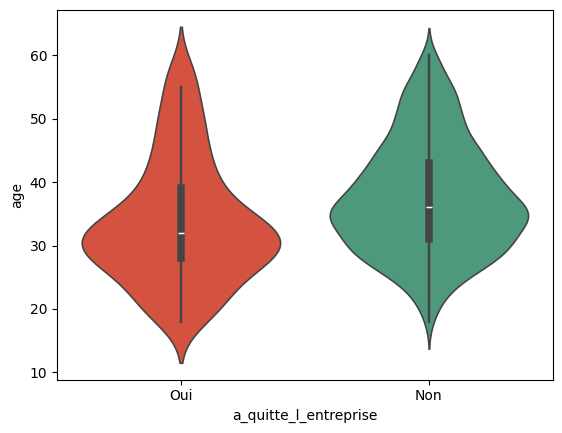

**Interprétation :** On observe que les employés les plus jeunes démissionnent moins, tout comme les plus âgés. En revanche, la probabilité de démission est plus marquée entre 28 et 32 ans. Cependant, cette densité demeure globalement proche de celle des employés restants.



---revenu_mensuel---


count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: revenu_mensuel, dtype: float64

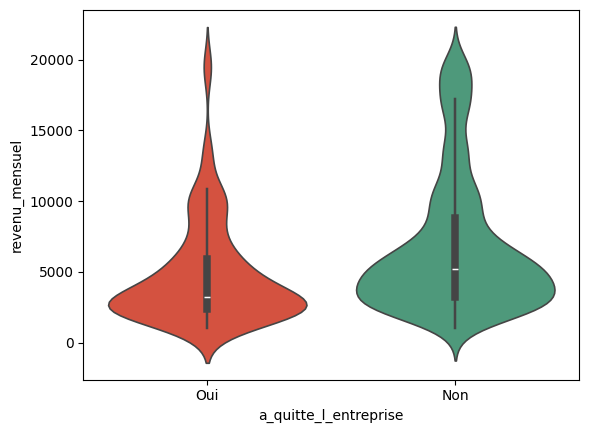

**Interprétation :** On constate une forte concentration de démissions chez les employés percevant un salaire compris entre 2 000 et 2 500 €. Cette tendance diminue progressivement à mesure que le revenu augmente, avec toutefois une légère hausse autour de 10 000 €. Les démissions deviennent quasiment inexistantes aux alentours de 15 000 €.



---nombre_experiences_precedentes---


count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: nombre_experiences_precedentes, dtype: float64

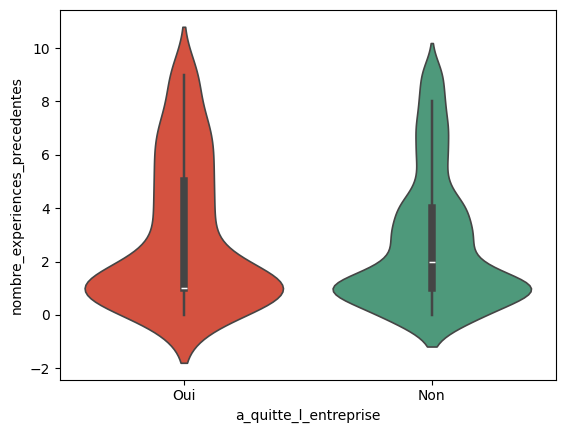

**Interprétation :** On observe une forte densité de démissions chez les employés ayant environ une année d’expérience précédente. Cette tendance chute nettement à partir de deux ans d’expérience, indiquant que la majorité des démissions surviennent au cours de la première année d’expérience professionnelle antérieure.



---nombre_heures_travailless---


count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: nombre_heures_travailless, dtype: float64

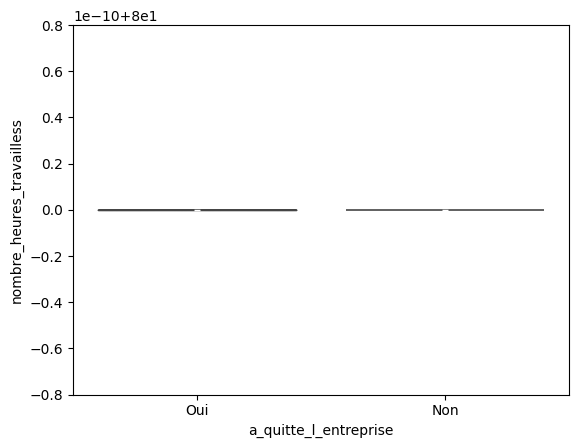

**Interprétation :** Nous n’observons aucune variation notable selon le nombre d’heures travaillées. La distribution est donc plate, indiquant qu’il n’existe pas de lien apparent entre le volume horaire et la probabilité de démission.



---annee_experience_totale---


count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: annee_experience_totale, dtype: float64

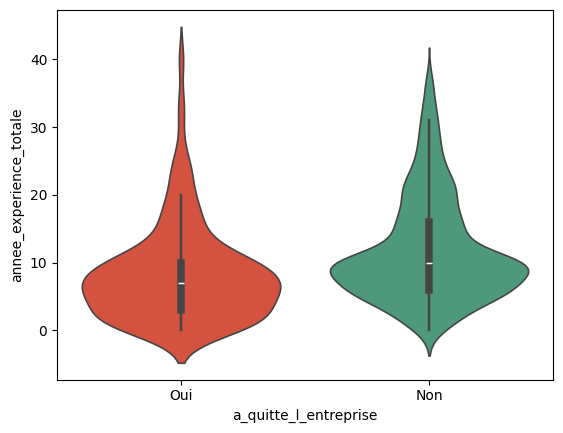

**Interprétation :** Nous observons une forte densité de démissions chez les employés ayant entre 2 et 9 années d’expérience totale. Au-delà de cette plage, le nombre de démissions diminue progressivement.



---annees_dans_l_entreprise---


count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: annees_dans_l_entreprise, dtype: float64

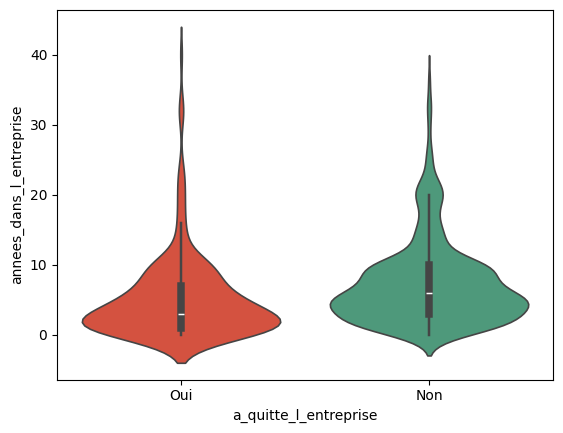

**Interprétation :** On observe une forte densité de démissions chez les employés comptant entre 1 et 2 ans au sein de l’entreprise. Ensuite, le taux de démission diminue progressivement avec l’ancienneté, devenant quasi nul autour de 26 à 28 ans. On note une légère hausse aux alentours de 30 ans, suivie d’une nouvelle baisse.



---annees_dans_le_poste_actuel---


count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: annees_dans_le_poste_actuel, dtype: float64

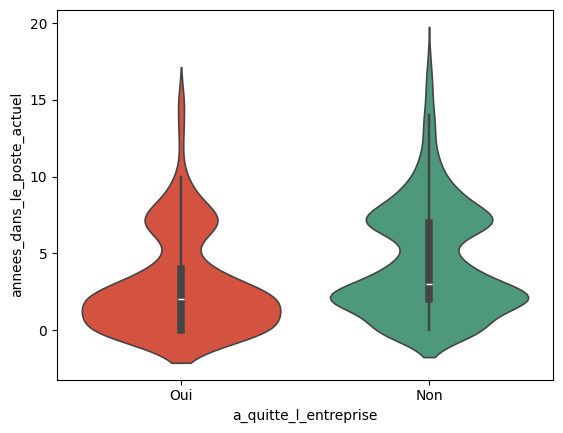

**Interprétation :** Les employés ayant occupé leur poste entre 0 et 3 ans présentent une forte tendance à démissionner. Cette tendance diminue à partir de 4 ans, puis connaît une légère hausse autour de 7 ans.



---satisfaction_employee_environnement---


count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_environnement, dtype: float64

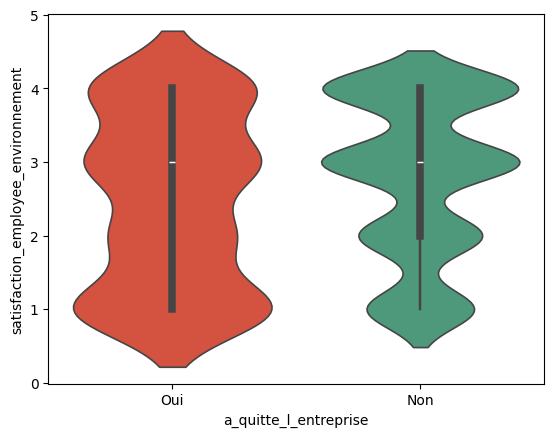

**Interprétation :** On constate que les employés ayant démissionné étaient globalement satisfaits de l’environnement de travail. La densité de démissions reste élevée quel que soit le niveau de satisfaction.



---note_evaluation_precedente---


count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: note_evaluation_precedente, dtype: float64

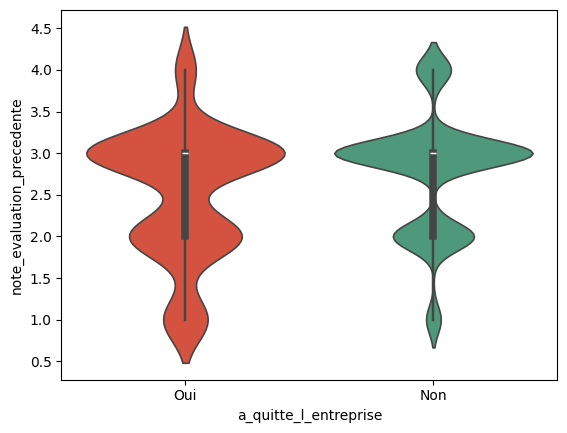

**Interprétation :** La majorité des employés ayant démissionné avaient une note d’évaluation précédente de 3, ce qui indique une performance globalement bonne.



---niveau_hierarchique_poste---


count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: niveau_hierarchique_poste, dtype: float64

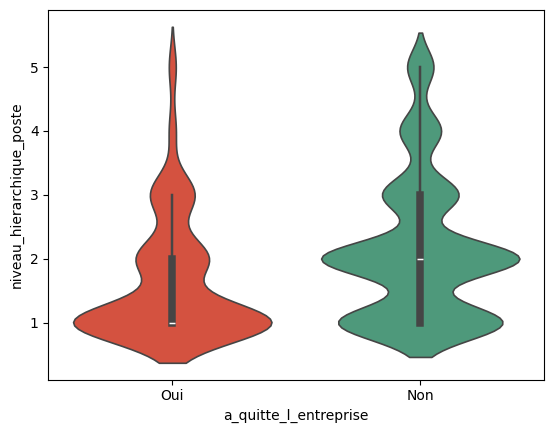

**Interprétation :** On observe une forte densité de démissions chez les employés de niveau hiérarchique 1. Plus le niveau hiérarchique augmente, moins les démissions sont fréquentes.



---satisfaction_employee_nature_travail---


count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_nature_travail, dtype: float64

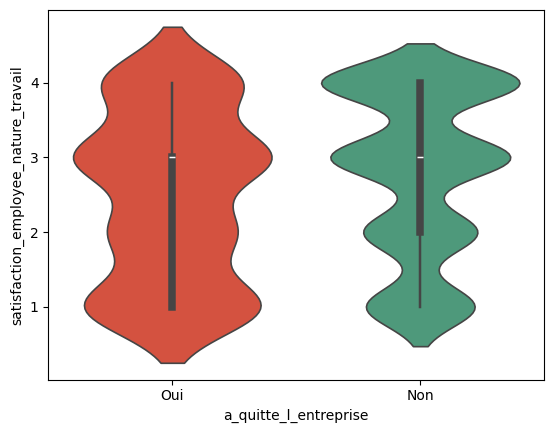

**Interprétation :** On observe que, quel que soit le niveau de satisfaction (de 1 à 4), les employés ayant démissionné étaient présents en densité notable à chaque palier.



---satisfaction_employee_equipe---


count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: satisfaction_employee_equipe, dtype: float64

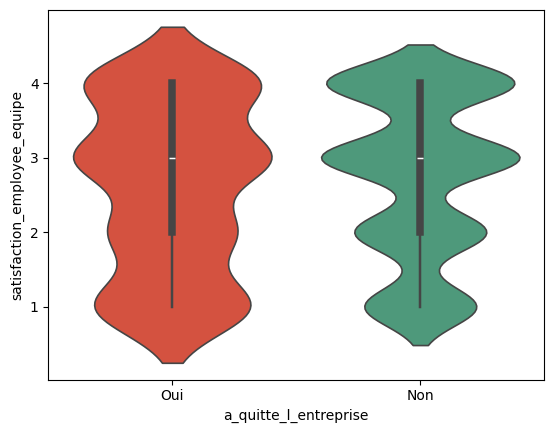

**Interprétation :** On constate que les employés ayant démissionné étaient présents en densité élevée à chaque niveau de satisfaction au sein de l’équipe, mais majoritairement satisfait à 3.



---satisfaction_employee_equilibre_pro_perso---


count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: satisfaction_employee_equilibre_pro_perso, dtype: float64

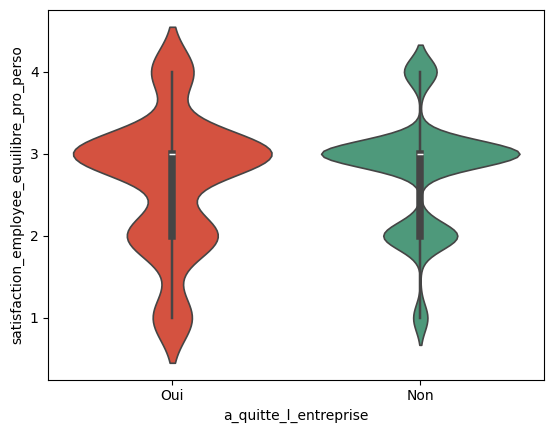

**Interprétation :** La majorité des employés ayant démissionné présentaient un niveau de satisfaction élevé concernant leur équilibre entre vie professionnelle et vie personnelle, avec une médiane de 3 sur 4.



---note_evaluation_actuelle---


count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: note_evaluation_actuelle, dtype: float64

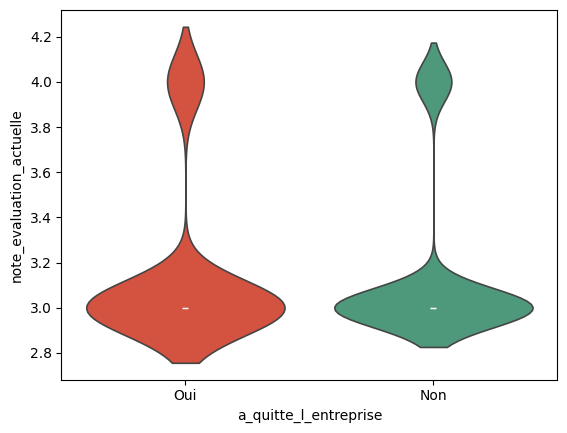

**Interprétation :** On observe une forte concentration de démissions chez les employés ayant des notes actuelles autour de 3 et 4. Les démissionnaires affichent donc de bonnes performances moyennes, une tendance qui reste cependant assez proche de celle des employés toujours en poste.



---augementation_salaire_precedente---


count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: augementation_salaire_precedente, dtype: float64

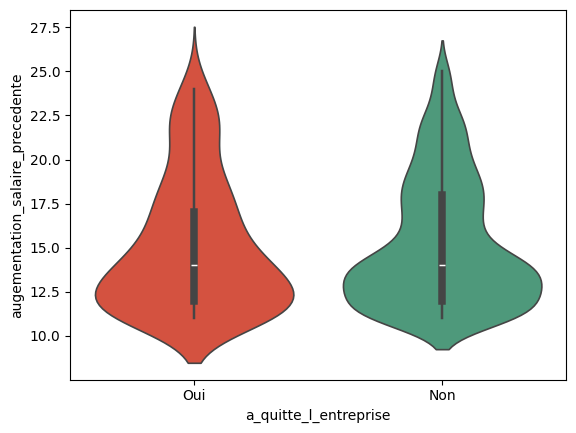

**Interprétation :** Non définie pour cette variable.



---nombre_participation_pee---


count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: nombre_participation_pee, dtype: float64

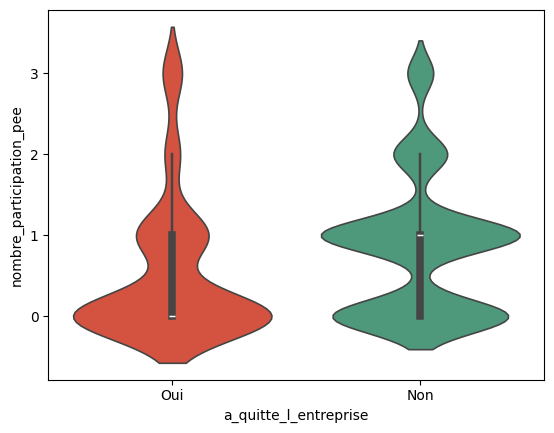

**Interprétation :** On constate que la majorité des employés ayant démissionné n’avaient pas participé au PEE, selon la densité observée.



---nb_formations_suivies---


count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: nb_formations_suivies, dtype: float64

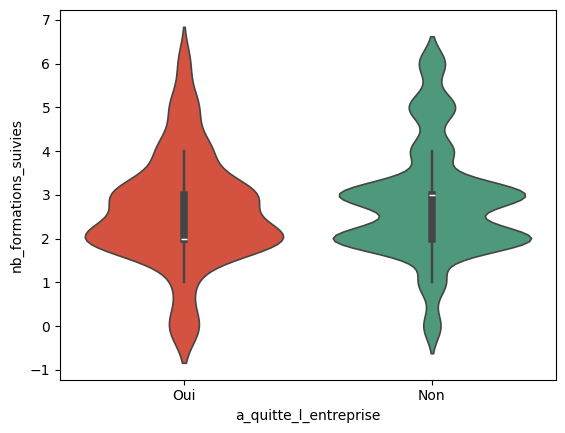

**Interprétation :** On constate que les employés ayant démissionné ont majoritairement suivi 2 ou 3 formations. En dessous ou au-delà de ce nombre, les démissions sont moins fréquentes, avec un léger pic chez ceux n’ayant suivi aucune formation.



---nombre_employee_sous_responsabilite---


count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: nombre_employee_sous_responsabilite, dtype: float64

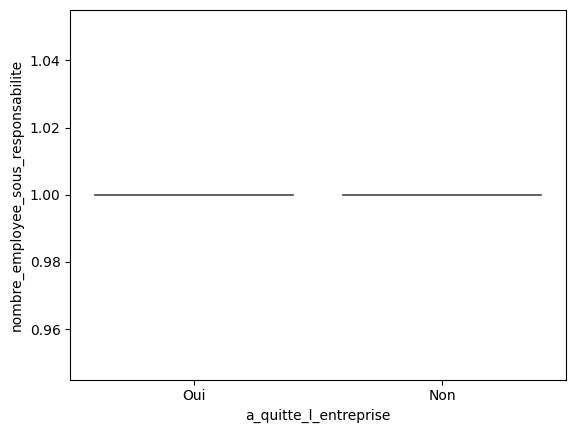

**Interprétation :** On constate qu’il n’y a pas de variation significative dans cette variable, ce qui se traduit par l’absence de distribution notable.



---distance_domicile_travail---


count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: distance_domicile_travail, dtype: float64

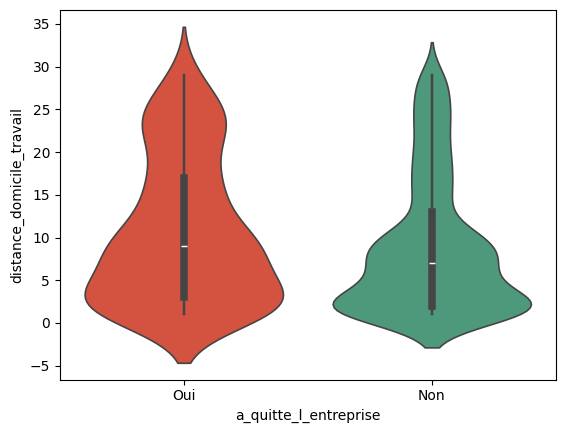

**Interprétation :** On observe que les démissions sont plus fréquentes pour les employés dont la distance domicile-travail est inférieure à 10 km et supérieure à 3 km. Dans l’ensemble, la densité de démissions reste relativement élevée sur l’ensemble des distances.



---niveau_education---


count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: niveau_education, dtype: float64

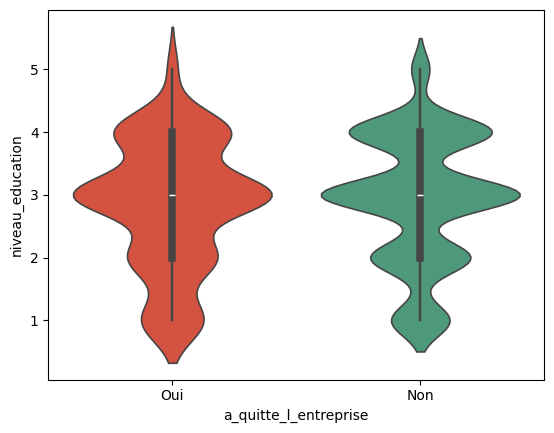

**Interprétation :** On constate plusieurs variations dans la densité des démissions selon le niveau d’éducation, avec des pics particulièrement marqués pour les niveaux 3 et 4.



---annees_depuis_la_derniere_promotion---


count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: annees_depuis_la_derniere_promotion, dtype: float64

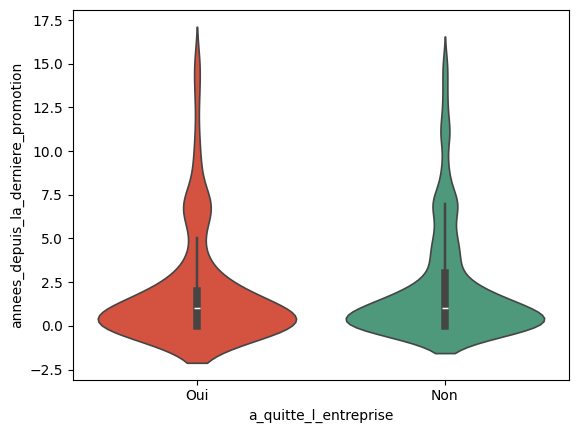

**Interprétation :** On observe une densité marquée de démissions chez les employés dont la dernière promotion remonte à un an. Cette tendance reste globalement similaire à celle des employés toujours en poste.



---annes_sous_responsable_actuel---


count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: annes_sous_responsable_actuel, dtype: float64

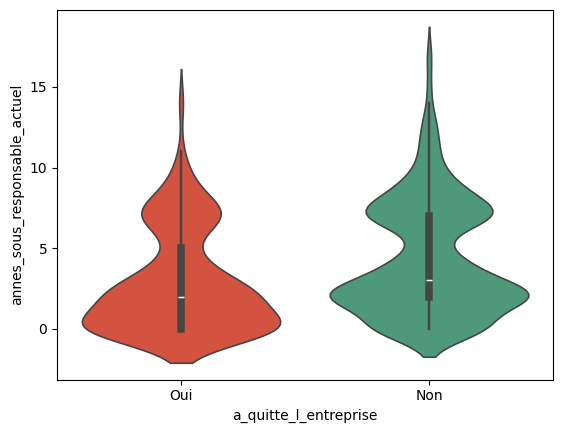

**Interprétation :** Les démissions sont plus fréquentes chez les employés ayant moins de deux à trois ans sous leur responsable actuel. Cette tendance diminue ensuite, avec un pic observé autour de 8 à 9 ans.





In [303]:
interpretations = {
    "age": "On observe que les employés les plus jeunes démissionnent moins, tout comme les plus âgés. En revanche, la probabilité de démission est plus marquée entre 28 et 32 ans. Cependant, cette densité demeure globalement proche de celle des employés restants.",
    "revenu_mensuel": "On constate une forte concentration de démissions chez les employés percevant un salaire compris entre 2 000 et 2 500 €. Cette tendance diminue progressivement à mesure que le revenu augmente, avec toutefois une légère hausse autour de 10 000 €. Les démissions deviennent quasiment inexistantes aux alentours de 15 000 €.",
    "nombre_experiences_precedentes": "On observe une forte densité de démissions chez les employés ayant environ une année d’expérience précédente. Cette tendance chute nettement à partir de deux ans d’expérience, indiquant que la majorité des démissions surviennent au cours de la première année d’expérience professionnelle antérieure.",
    "nombre_heures_travailless": "Nous n’observons aucune variation notable selon le nombre d’heures travaillées. La distribution est donc plate, indiquant qu’il n’existe pas de lien apparent entre le volume horaire et la probabilité de démission.",
    "annee_experience_totale": "Nous observons une forte densité de démissions chez les employés ayant entre 2 et 9 années d’expérience totale. Au-delà de cette plage, le nombre de démissions diminue progressivement.",
    "annees_dans_l_entreprise": "On observe une forte densité de démissions chez les employés comptant entre 1 et 2 ans au sein de l’entreprise. Ensuite, le taux de démission diminue progressivement avec l’ancienneté, devenant quasi nul autour de 26 à 28 ans. On note une légère hausse aux alentours de 30 ans, suivie d’une nouvelle baisse.",
    "annees_dans_le_poste_actuel": "Les employés ayant occupé leur poste entre 0 et 3 ans présentent une forte tendance à démissionner. Cette tendance diminue à partir de 4 ans, puis connaît une légère hausse autour de 7 ans.",
    "satisfaction_employee_environnement": "On constate que les employés ayant démissionné étaient globalement satisfaits de l’environnement de travail. La densité de démissions reste élevée quel que soit le niveau de satisfaction.",
    "note_evaluation_precedente": "La majorité des employés ayant démissionné avaient une note d’évaluation précédente de 3, ce qui indique une performance globalement bonne.",
    "niveau_hierarchique_poste": "On observe une forte densité de démissions chez les employés de niveau hiérarchique 1. Plus le niveau hiérarchique augmente, moins les démissions sont fréquentes.",
    "satisfaction_employee_nature_travail": "On observe que, quel que soit le niveau de satisfaction (de 1 à 4), les employés ayant démissionné étaient présents en densité notable à chaque palier.",
    "satisfaction_employee_equipe": "On constate que les employés ayant démissionné étaient présents en densité élevée à chaque niveau de satisfaction au sein de l’équipe, mais majoritairement satisfait à 3.",
    "satisfaction_employee_equilibre_pro_perso": "La majorité des employés ayant démissionné présentaient un niveau de satisfaction élevé concernant leur équilibre entre vie professionnelle et vie personnelle, avec une médiane de 3 sur 4.",
    "note_evaluation_actuelle": "On observe une forte concentration de démissions chez les employés ayant des notes actuelles autour de 3 et 4. Les démissionnaires affichent donc de bonnes performances moyennes, une tendance qui reste cependant assez proche de celle des employés toujours en poste.",
    "nombre_participation_pee": "On constate que la majorité des employés ayant démissionné n’avaient pas participé au PEE, selon la densité observée.",
    "nb_formations_suivies": "On constate que les employés ayant démissionné ont majoritairement suivi 2 ou 3 formations. En dessous ou au-delà de ce nombre, les démissions sont moins fréquentes, avec un léger pic chez ceux n’ayant suivi aucune formation.",
    "nombre_employee_sous_responsabilite": "On constate qu’il n’y a pas de variation significative dans cette variable, ce qui se traduit par l’absence de distribution notable.",
    "distance_domicile_travail": "On observe que les démissions sont plus fréquentes pour les employés dont la distance domicile-travail est inférieure à 10 km et supérieure à 3 km. Dans l’ensemble, la densité de démissions reste relativement élevée sur l’ensemble des distances.",
    "niveau_education": "On constate plusieurs variations dans la densité des démissions selon le niveau d’éducation, avec des pics particulièrement marqués pour les niveaux 3 et 4.",
    "annees_depuis_la_derniere_promotion": "On observe une densité marquée de démissions chez les employés dont la dernière promotion remonte à un an. Cette tendance reste globalement similaire à celle des employés toujours en poste.",
    "annes_sous_responsable_actuel": "Les démissions sont plus fréquentes chez les employés ayant moins de deux à trois ans sous leur responsable actuel. Cette tendance diminue ensuite, avec un pic observé autour de 8 à 9 ans."
}
for column in numeric_features:
    print(f"---{column}---")
    display(central_df[column].describe())

    sns.violinplot(
        central_df, x="a_quitte_l_entreprise", 
        y=column, inner='box', 
        linewidth=1.2, 
        hue="a_quitte_l_entreprise", 
        palette={
            "Non": "#41A67E",
            "Oui":"#ED3F27"
        }
    )
    plt.show()

    # Interprétation exacte
    if column in interpretations:
        print(f"**Interprétation :** {interpretations[column]}\n")
    else:
        print("**Interprétation :** Non définie pour cette variable.\n")
    
    print("\n")

#### Statistiques des colonnes catégorielles

In [304]:
functions.category_descriptive_stat(central_df, categorical_features)

Pour la colonne genre


,Effectif,Fréquence
genre,,
M,882,60.0
F,588,40.0


Pour la colonne statut_marital


,Effectif,Fréquence
statut_marital,,
Marié(e),673,45.78
Célibataire,470,31.97
Divorcé(e),327,22.24


Pour la colonne departement


,Effectif,Fréquence
departement,,
Consulting,961,65.37
Commercial,446,30.34
Ressources Humaines,63,4.29


Pour la colonne poste


,Effectif,Fréquence
poste,,
Cadre Commercial,326,22.18
Assistant de Direction,292,19.86
Consultant,259,17.62
Tech Lead,145,9.86
Manager,131,8.91
Senior Manager,102,6.94
Représentant Commercial,83,5.65
Directeur Technique,80,5.44
Ressources Humaines,52,3.54


Pour la colonne heure_supplementaires


,Effectif,Fréquence
heure_supplementaires,,
Non,1054,71.7
Oui,416,28.3


Pour la colonne a_quitte_l_entreprise


,Effectif,Fréquence
a_quitte_l_entreprise,,
Non,1233,83.88
Oui,237,16.12


Pour la colonne domaine_etude


,Effectif,Fréquence
domaine_etude,,
Infra & Cloud,606,41.22
Transformation Digitale,464,31.56
Marketing,159,10.82
Entrepreunariat,132,8.98
Autre,82,5.58
Ressources Humaines,27,1.84


Pour la colonne ayant_enfants


,Effectif,Fréquence
ayant_enfants,,
Y,1470,100.0


Pour la colonne frequence_deplacement


,Effectif,Fréquence
frequence_deplacement,,
Occasionnel,1043,70.95
Frequent,277,18.84
Aucun,150,10.20


---

## Constat sur le Déséquilibre des Classes

Nous avons identifié un **fort déséquilibre de classe** sur notre variable cible **`(a_quitte_l_entreprise)`**.

La répartition des classes est la suivante :

* **Classe Majoritaire (Non) :** **83,88%** des observations (employés qui restent).
* **Classe Minoritaire (Oui) :** **16,12%** des observations (démissionnaires).

---

### Etude des relations entre les features

## A - Features numériques

In [305]:
#Retrait des features constantes
central_df.drop(
    columns=["nombre_heures_travailless","nombre_employee_sous_responsabilite"],
    inplace=True
)
numeric_features.remove("nombre_heures_travailless")
numeric_features.remove("nombre_employee_sous_responsabilite")
numeric_features.append("target_encoded")
central_df["target_encoded"] = central_df["a_quitte_l_entreprise"].map({
    "Oui": 1,
    "Non": 0
})
corr_spearman = central_df[numeric_features].corr(method="spearman")

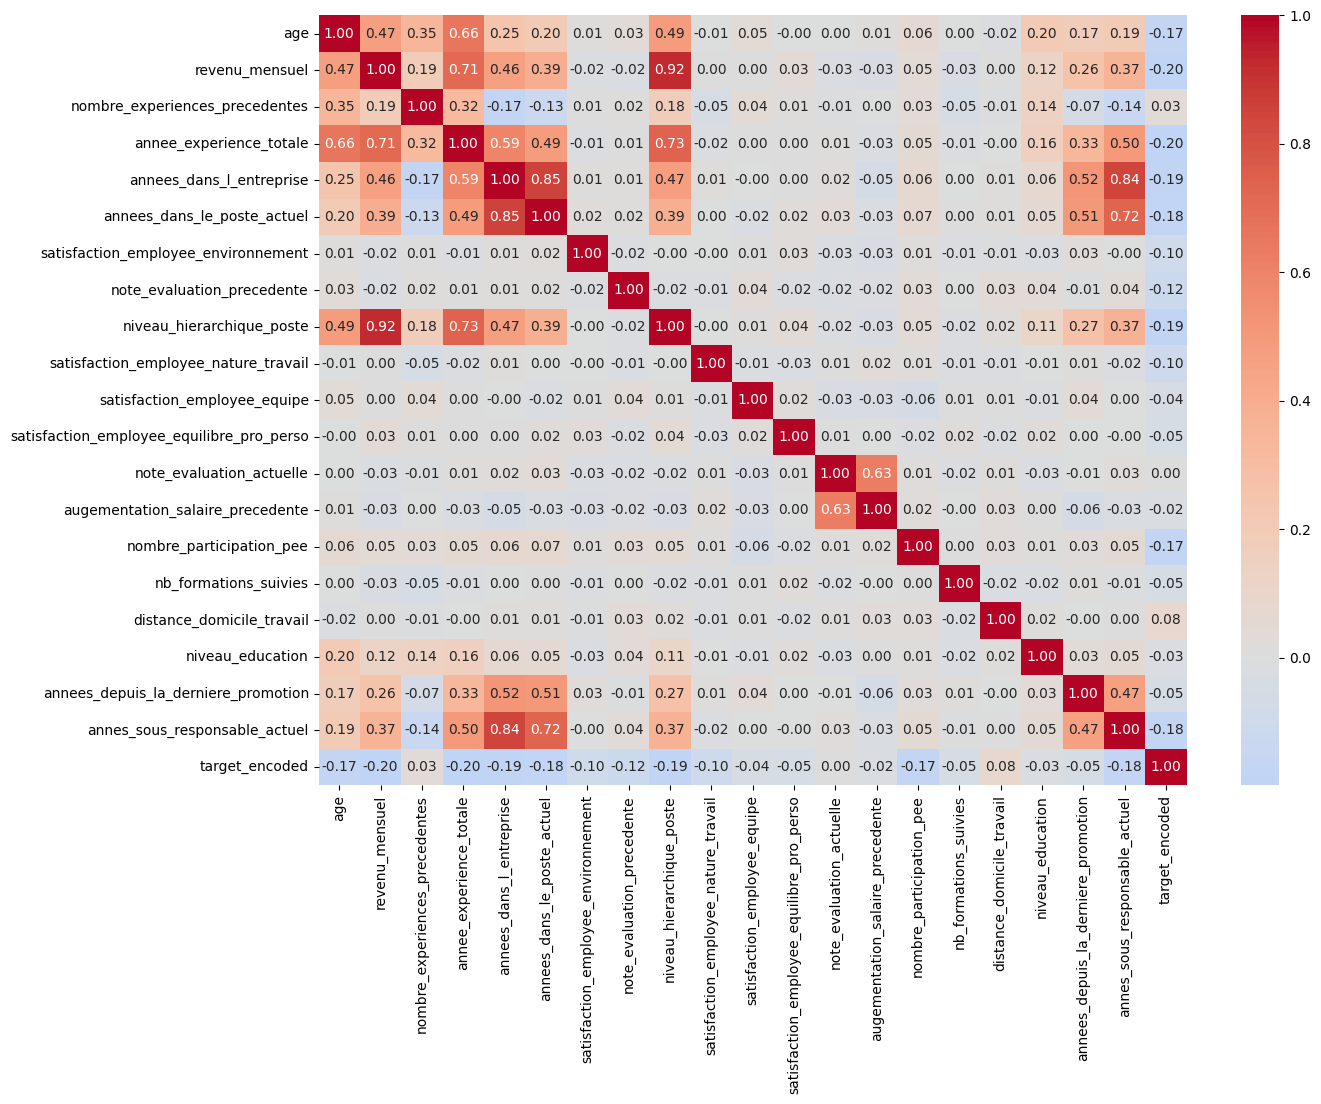

In [306]:
plt.figure(figsize=(14,10))
sns.heatmap(
    corr_spearman,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)
plt.show()

In [307]:
colinearity = dict()
corr_spearman_copy = corr_spearman.copy()
corr_spearman_copy[column] = corr_spearman_copy[column].abs()

for column in corr_spearman.columns:
    mask = (corr_spearman_copy[column] > 0.7) & (corr_spearman_copy[column] < 1)
    correlated_features = corr_spearman_copy.index[mask].tolist()

    if correlated_features:
        colinearity[column] = correlated_features

display(colinearity)


{'revenu_mensuel': ['annee_experience_totale', 'niveau_hierarchique_poste'],
 'annee_experience_totale': ['revenu_mensuel', 'niveau_hierarchique_poste'],
 'annees_dans_l_entreprise': ['annees_dans_le_poste_actuel',
  'annes_sous_responsable_actuel'],
 'annees_dans_le_poste_actuel': ['annees_dans_l_entreprise',
  'annes_sous_responsable_actuel'],
 'niveau_hierarchique_poste': ['revenu_mensuel', 'annee_experience_totale'],
 'annes_sous_responsable_actuel': ['annees_dans_l_entreprise',
  'annees_dans_le_poste_actuel']}

### Analyse de la colinéarité entre variables

Nous avons une **colinéarité notable** entre plusieurs paires de variables, ce qui peut indiquer une redondance d’information dans le modèle.

---

### 1. Revenu, expérience et niveau hiérarchique  
Les variables suivantes présentent des corrélations importantes :  
- `revenu_mensuel`, `annee_experience_totale` et `niveau_hierarchique_poste`, avec :  
  - **revenu_mensuel ↔ annee_experience_totale** → *0.71*  
  - **revenu_mensuel ↔ niveau_hierarchique_poste** → *0.92*  
  - **annee_experience_totale ↔ niveau_hierarchique_poste** → *0.73*

---

### 2. Ancienneté, poste et responsable  
On observe également une forte colinéarité entre :  
- `annees_dans_l_entreprise`, `annees_dans_le_poste_actuel` et `annes_sous_responsable_actuel`, avec :  
  - **annees_dans_l_entreprise ↔ annees_dans_le_poste_actuel** → *0.85*  
  - **annees_dans_l_entreprise ↔ annes_sous_responsable_actuel** → *0.84*  
  - **annees_dans_le_poste_actuel ↔ annes_sous_responsable_actuel** → *0.72*

---

### Corrélation avec la variable cible `target_encoded`

***D’après les valeurs de corrélation avec la variable `target_encoded`, nous obtenons :***  
- `revenu_mensuel` : **-0.20**  
- `annee_experience_totale` : **-0.20**  
- `niveau_hierarchique_poste` : **-0.19**

 *Les trois variables étant fortement corrélées entre elles, il convient d’en conserver une seule afin d’éviter la redondance et les effets de colinéarité.*  

 *D’un point de vue statistique, il serait pertinent de garder soit `revenu_mensuel`, soit `annee_experience_totale`, en raison de leur corrélation similaire avec la variable cible.*  
 *Cependant, d’un point de vue logique et contextuel, il est plus cohérent de conserver `revenu_mensuel`, le salaire étant un facteur déterminant dans la décision de démission.*

---

### Variables d’ancienneté
- `annees_dans_l_entreprise` : **-0.19**  
- `annees_dans_le_poste_actuel` : **-0.18**  
- `annes_sous_responsable_actuel` : **-0.19**

 *Ces trois variables présentent une corrélation similaire et sont également colinéaires entre elles. Afin d’éviter toute redondance, une seule doit être conservée pour l’analyse.*  

 *D’un point de vue logique, il est plus pertinent de conserver `annees_dans_l_entreprise`, car elle traduit directement l’ancienneté globale du salarié dans l’entreprise — un facteur clé pour comprendre les dynamiques de démission.*

### Vérification statistique

Pour confirmer ces conclusions, nous procéderons à un **test de Kruskal-Wallis**, afin de vérifier si les différences observées entre les features et la target sont **avérées**.

### ***Test du Kuskal - Wallis***

In [308]:
from scipy.stats import kruskal

numeric_features.remove("target_encoded")

result_kruskal = dict()

for column in numeric_features:

    #Séparation des différentes modalités de la target pour la colonne concernée
    yes_group = central_df[central_df["a_quitte_l_entreprise"] == "Oui"][column]
    no_group = central_df[central_df["a_quitte_l_entreprise"] == "Non"][column]

    if len(yes_group) > 0 and len(no_group) > 0:
        statistique_H, p_value = kruskal(yes_group, no_group)
        
        result_kruskal[column] = {
            "Statistique_H": round(statistique_H, 2),
            "p_value": round(p_value, 2),
            "Strong_p_value": p_value < 0.05
        }

    else:
        results_kruskal[column] = {'p_value': 'N/A', 'Statistique_H': 'N/A', 'Significatif (p<0.05)': False}
        print(f"Attention : Données insuffisantes pour le test Kruskal-Wallis sur {column}")

result_kruskal = pd.DataFrame.from_dict(result_kruskal, orient="index")
display(result_kruskal)
        

,Statistique_H,p_value,Strong_p_value
age,43.06,0.00,True
revenu_mensuel,57.77,0.00,True
nombre_experiences_precedentes,1.37,0.24,False
annee_experience_totale,58.18,0.00,True
annees_dans_l_entreprise,53.27,0.00,True
annees_dans_le_poste_actuel,47.93,0.00,True
satisfaction_employee_environnement,13.68,0.00,True
note_evaluation_precedente,20.98,0.00,True
niveau_hierarchique_poste,53.24,0.00,True
satisfaction_employee_nature_travail,15.57,0.00,True


***Grâce à des p-values à 0, nous pouvons valider nos choix de conserver `revenu_mensuel` et `annees_dans_l_entreprise` par rapport aux autres variables colinéaires.***  

Cette étape nous permet également de **supprimer les features** qui ne présentent pas de distribution significativement différente ou de médiane distincte entre les démissionnaires et les non-démissionnaires, comme indiqué par la colonne `Strong_p_value`.


In [309]:
central_df.drop(
    columns= [
        "annee_experience_totale",
        "niveau_hierarchique_poste",
        "annees_dans_le_poste_actuel",
        "annes_sous_responsable_actuel",

        "nombre_experiences_precedentes",
        "satisfaction_employee_equipe",
        "note_evaluation_actuelle",
        "augementation_salaire_precedente",
        "niveau_education",
        "target_encoded"
    ],
    inplace=True
)

#Mettre à jour notre liste de colonne numérique
numeric_features = [column for column in numeric_features if column in central_df.columns]

In [310]:
display(central_df.shape[1])

23

In [311]:
display(numeric_features)

['age',
 'revenu_mensuel',
 'annees_dans_l_entreprise',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equilibre_pro_perso',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'annees_depuis_la_derniere_promotion']

## B - Features catégorielles

Pour étudier les relations entre les features catégorielles et la variable cible, nous allons utiliser la méthode du `chi 2` **(X²)**

In [312]:
from scipy.stats import chi2_contingency

results_chi2 = {}
TARGET_VAR = "a_quitte_l_entreprise"

for column in categorical_features:
    #Création du table de contingence
    table_contingence = pd.crosstab(central_df[column], central_df[TARGET_VAR])

    try:
        chi2, p_value, dof, expected = chi2_contingency(table_contingence)

        results_chi2[column] = {
            "Statistique_chi2": round(chi2, 3),
            "p_value": round(p_value, 5),
            "Significatif (p<0.05)": p_value < 0.05
        }
    except ValueError:
        results_chi2[column] = {
            "Statistique_chi2": "N/A",
            "p_value": "N/A",
            "Significatif (p<0.05)": False
        }
        print(f"Présence éventuelle de cellue vide/NaN sur {column}")

results_chi2 = pd.DataFrame.from_dict(results_chi2, orient="index")
results_chi2.sort_values(by="p_value", ascending=True)

display(results_chi2)

,Statistique_chi2,p_value,Significatif (p<0.05)
genre,1.117,0.29057,False
statut_marital,46.164,0.00000,True
departement,10.796,0.00453,True
poste,86.190,0.00000,True
heure_supplementaires,87.564,0.00000,True
a_quitte_l_entreprise,1462.615,0.00000,True
domaine_etude,16.025,0.00677,True
ayant_enfants,0.000,1.00000,False
frequence_deplacement,24.182,0.00001,True


Nous constatons que **deux variables catégorielles n’ont aucune association significative avec la variable cible**, ce qui indique qu’elles n’apportent pas d’information utile pour expliquer les démissions.

In [313]:
central_df.drop(
    columns = [
        "genre",
        "ayant_enfants"
    ],
    inplace=True
)

#Mettre à jour notre liste de variable catégorielle
categorical_features.remove("genre")
categorical_features.remove("ayant_enfants")

In [314]:
display(central_df.shape[1])

21

In [315]:
display(central_df)

,id_employee,age,revenu_mensuel,statut_marital,departement,poste,annees_dans_l_entreprise,satisfaction_employee_environnement,note_evaluation_precedente,satisfaction_employee_nature_travail,satisfaction_employee_equilibre_pro_perso,heure_supplementaires,eval_code,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,code_sondage,distance_domicile_travail,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion
0,1,41,5993,Célibataire,Commercial,Cadre Commercial,6,2,3,4,1,Oui,1,Oui,0,0,1,1,Infra & Cloud,Occasionnel,0
1,2,49,5130,Marié(e),Consulting,Assistant de Direction,10,3,2,2,3,Non,2,Non,1,3,2,8,Infra & Cloud,Frequent,1
2,4,37,2090,Célibataire,Consulting,Consultant,0,4,2,3,3,Oui,4,Oui,0,3,4,2,Autre,Occasionnel,0
3,5,33,2909,Marié(e),Consulting,Assistant de Direction,8,4,3,3,3,Oui,5,Non,0,3,5,3,Infra & Cloud,Frequent,3
4,7,27,3468,Marié(e),Consulting,Consultant,2,1,3,2,3,Non,7,Non,1,3,7,2,Transformation Digitale,Occasionnel,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,2571,Marié(e),Consulting,Consultant,5,3,4,4,3,Non,2061,Non,1,3,2061,23,Transformation Digitale,Frequent,0
1466,2062,39,9991,Marié(e),Consulting,Manager,7,4,2,1,3,Non,2062,Non,1,5,2062,6,Transformation Digitale,Occasionnel,1
1467,2064,27,6142,Marié(e),Consulting,Tech Lead,6,2,4,2,3,Oui,2064,Non,1,0,2064,4,Infra & Cloud,Occasionnel,0
1468,2065,49,5390,Marié(e),Commercial,Cadre Commercial,9,4,2,2,2,Non,2065,Non,0,3,2065,2,Transformation Digitale,Frequent,0


## Préparation des données pour le modèle

Après avoir **nettoyé le jeu de données** en supprimant les colonnes inutiles ou redondantes, nous passons maintenant à la **préparation des variables pour l'entraînement du modèle** :  

- **Mise à l’échelle des variables numériques** : afin d'assurer que toutes les features numériques soient sur une échelle comparable, ce qui est crucial pour de nombreux algorithmes de machine learning.  
- **Encodage des variables catégorielles** : pour transformer les features non numériques en représentations numériques exploitables par le modèle.

Cette étape garantit que les données sont **standardisées et adaptées** pour l’algorithme de classification que nous allons utiliser.

### Séparation des données en Train/Test

Avant cette étape, nous procédons à la **séparation des données en ensembles d’entraînement et de test**.  
Nous utilisons le paramètre `stratify` afin de **garantir une répartition équilibrée des modalités `Oui` et `Non`** de la variable cible entre les deux ensembles.


In [316]:
from sklearn.model_selection import train_test_split

#Séparation des features et la cible
X = central_df.drop("a_quitte_l_entreprise", axis=1)
y = central_df["a_quitte_l_entreprise"]

#Sépration entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Stratify=y garantit que les proportions de Oui/Non sont les mêmes dans train et test (Nous avons un déséquilibre de classe).

### Scaling

In [321]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Entraîner le scaler et transformer les données d'entraînement
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# On utilise UNIQUEMENT .transform() pour appliquer les moyennes/écarts-types appris sur X_train
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [324]:
display(X_train.head(2))
display(X_test.head(2))

,id_employee,age,revenu_mensuel,statut_marital,departement,poste,annees_dans_l_entreprise,satisfaction_employee_environnement,note_evaluation_precedente,satisfaction_employee_nature_travail,satisfaction_employee_equilibre_pro_perso,heure_supplementaires,eval_code,nombre_participation_pee,nb_formations_suivies,code_sondage,distance_domicile_travail,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion
1194,1676,1.090194,2.026752,Divorcé(e),Commercial,Senior Manager,-0.665706,-0.658710,1.795282,-0.647997,0.337621,Non,1676,2.61310,-0.605389,1676,-0.899915,Infra & Cloud,Occasionnel,-0.368024
128,169,-1.634828,-0.864408,Marié(e),Consulting,Consultant,-0.830071,0.260202,0.373564,1.153526,0.337621,Non,169,0.24743,-0.605389,169,-0.899915,Entrepreunariat,Occasionnel,-0.056884


,id_employee,age,revenu_mensuel,statut_marital,departement,poste,annees_dans_l_entreprise,satisfaction_employee_environnement,note_evaluation_precedente,satisfaction_employee_nature_travail,satisfaction_employee_equilibre_pro_perso,heure_supplementaires,eval_code,nombre_participation_pee,nb_formations_suivies,code_sondage,distance_domicile_travail,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion
1061,1495,-1.416826,-0.969745,Marié(e),Commercial,Représentant Commercial,-0.994436,1.179114,0.373564,-0.647997,0.337621,Non,1495,0.24743,-0.605389,1495,0.445433,Infra & Cloud,Aucun,-0.679165
891,1246,0.763191,-0.974474,Marié(e),Consulting,Assistant de Direction,0.484849,-1.577622,1.795282,1.153526,0.337621,Non,1246,0.24743,1.783664,1246,-0.899915,Infra & Cloud,Occasionnel,1.498820


### Encodage